In [1]:
# Installing dependencies
import pandas as pd
import numpy as np
import math as ma
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import pandas_profiling as pp

In [2]:
# Upload data
from google.colab import files
uploaded = files.upload()

Saving raw_data.xlsx to raw_data.xlsx


In [3]:
# Printing sheet name in the spreadsheet
print(pd.ExcelFile("raw_data.xlsx").sheet_names)

['Title Sheet', 'Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']


In [4]:
# Reading the file
cust_demo = pd.read_excel("raw_data.xlsx", header=1, index_col=0, sheet_name='CustomerDemographic')
cust_demo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
customer_id,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN


In [5]:
# Identifying unique values for columns
print(cust_demo['gender'].unique())
print(cust_demo['job_industry_category'].unique())
print(cust_demo['wealth_segment'].unique())
print(cust_demo['deceased_indicator'].unique())

['F' 'Male' 'Female' 'U' 'Femal' 'M']
['Health' 'Financial Services' 'Property' 'IT' nan 'Retail' 'Argiculture'
 'Manufacturing' 'Telecommunications' 'Entertainment']
['Mass Customer' 'Affluent Customer' 'High Net Worth']
['N' 'Y']


In [6]:
# Data cleaning

# Dropping insignificant columns
cust_demo = cust_demo.drop(['first_name','last_name','job_title','default'], axis='columns')

# Dropping null rows
cust_demo = cust_demo.dropna()

# Cleaning 'Gender' column
cust_demo['gender'].replace(['F', 'Femal'], 'Female', inplace=True)
cust_demo['gender'].replace(['M'], 'Male', inplace=True)
cust_demo['gender'].replace(['U'], 'Unknown', inplace=True)

# Converting 'Deceased indicator' column to boolean
cust_demo['deceased_indicator'].replace(['N'], '0', inplace=True)
cust_demo['deceased_indicator'].replace(['Y'], '1', inplace=True)

# Converting 'owns_car' column to boolean
cust_demo['owns_car'].replace(['No'], '0', inplace=True)
cust_demo['owns_car'].replace(['Yes'], '1', inplace=True)

# Converting date format
cust_demo['DOB'] = pd.to_datetime(cust_demo['DOB'])
cust_demo['age'] = (dt.datetime.now() - cust_demo['DOB']) / np.timedelta64(1, 'Y')
cust_demo['age_class'] = ((round(cust_demo['age']/10))*10).astype(int)

# Excluding customer who are deceased
cust_demo.drop(cust_demo.index[cust_demo['deceased_indicator'] == 1], inplace=True)
cust_demo

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_class
customer_id,,,,,,,,,,
1,Female,93,1953-10-12,Health,Mass Customer,0,1,11.0,68.556157,70
2,Male,81,1980-12-16,Financial Services,Mass Customer,0,1,16.0,41.376954,40
3,Male,61,1954-01-20,Property,Mass Customer,0,1,15.0,68.282366,70
4,Male,33,1961-10-03,IT,Mass Customer,0,0,7.0,60.580634,60
6,Male,35,1966-09-16,Retail,High Net Worth,0,1,13.0,55.627760,60
...,...,...,...,...,...,...,...,...,...,...
3994,Female,5,1989-04-07,Manufacturing,Affluent Customer,0,0,12.0,33.070144,30
3995,Male,93,1975-12-12,Manufacturing,Mass Customer,0,1,14.0,46.390062,50
3996,Female,8,1975-08-09,Health,Mass Customer,0,0,19.0,46.732300,50


In [7]:
addr_df = pd.read_excel('raw_data.xlsx', header=1, index_col=0, sheet_name='CustomerAddress')
addr_df.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,New South Wales,Australia,10
2,6 Meadow Vale Court,2153,New South Wales,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,New South Wales,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


In [8]:
addr_df['state'].replace('New South Wales', 'NSW', inplace=True)
addr_df['state'].replace('Victoria', 'VIC', inplace=True)
addr_df = addr_df.dropna()
addr_df.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,NSW,Australia,10
2,6 Meadow Vale Court,2153,NSW,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,NSW,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


In [9]:
# Combine cust_df with addr_df
combined_df = pd.merge(cust_demo, addr_df, left_index=True, right_index=True)
num_null = combined_df.isna().sum()
# print(num_null)
combined_df.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation
customer_id,,,,,,,,,,,,,,,
1,Female,93,1953-10-12,Health,Mass Customer,0,1,11.0,68.556157,70,060 Morning Avenue,2016,NSW,Australia,10
2,Male,81,1980-12-16,Financial Services,Mass Customer,0,1,16.0,41.376954,40,6 Meadow Vale Court,2153,NSW,Australia,10
4,Male,33,1961-10-03,IT,Mass Customer,0,0,7.0,60.580634,60,0 Holy Cross Court,4211,QLD,Australia,9
6,Male,35,1966-09-16,Retail,High Net Worth,0,1,13.0,55.627760,60,9 Oakridge Court,3216,VIC,Australia,9
7,Female,6,1976-02-23,Financial Services,Affluent Customer,0,1,11.0,46.190195,50,4 Delaware Trail,2210,NSW,Australia,9


In [19]:
transaction_df = pd.read_excel('raw_data.xlsx', header=1, index_col=0, sheet_name='Transactions')
transaction_df.isna().sum()

product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [20]:
transaction_df['product_first_sold_date'] = pd.TimedeltaIndex(transaction_df['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)
transaction_df.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04
2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05
3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22
4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18
5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12


In [21]:
#transaction_df = transaction_df.dropna()
transaction_df['transaction_date'].describe(datetime_is_numeric=True)

count                         20000
mean     2017-07-01 14:08:05.280000
min             2017-01-01 00:00:00
25%             2017-04-01 00:00:00
50%             2017-07-03 00:00:00
75%             2017-10-02 00:00:00
max             2017-12-30 00:00:00
Name: transaction_date, dtype: object

In [22]:
most_recent_purchase = transaction_df['transaction_date'].max()
transaction_df['last_purchase_days'] = most_recent_purchase - transaction_df['transaction_date']
transaction_df['last_purchase_days'] /= np.timedelta64(1, 'D')
transaction_df['profit'] = transaction_df['list_price'] - transaction_df['standard_cost']
transaction_df.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,last_purchase_days,profit
transaction_id,,,,,,,,,,,,,,
1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04,308.0,17.87
2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05,223.0,1702.55
3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22,75.0,1544.61
4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18,121.0,817.36
5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12,90.0,1055.82


In [23]:
rfmTable = transaction_df.groupby('customer_id').agg({
    'last_purchase_days': lambda x: x.min(),
    'customer_id': lambda x: len(x),
    'profit': lambda x: x.sum()
})

rfmTable.rename(columns={
    'last_purchase_days': 'recency', 
    'customer_id': 'frequency', 
    'profit': 'monetary_value'
    }, inplace=True
)

rfmTable.head()

,recency,frequency,monetary_value
customer_id,,,
1,7.0,11,3018.09
2,128.0,3,2226.26
3,102.0,8,3362.81
4,195.0,2,220.57
5,16.0,6,2394.94


In [24]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])

def ROneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 4
    
def FMOneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 1

rfmScore = rfmTable
rfmScore['r_score'] = rfmScore['recency'].apply(ROneHotEncoder, args=('recency', quartiles))
rfmScore['f_score'] = rfmScore['frequency'].apply(FMOneHotEncoder, args=('frequency', quartiles))
rfmScore['m_score'] = rfmScore['monetary_value'].apply(FMOneHotEncoder, args=('monetary_value', quartiles))
rfmScore.head()

,recency,frequency,monetary_value,r_score,f_score,m_score
customer_id,,,,,,
1,7.0,11,3018.09,1,1,3
2,128.0,3,2226.26,4,4,2
3,102.0,8,3362.81,4,1,3
4,195.0,2,220.57,4,4,4
5,16.0,6,2394.94,1,2,2


In [25]:
rfmScore['rfm_class'] = 100 * rfmScore['r_score'] + 10 * rfmScore['f_score'] + rfmScore['m_score']
rfmScore['total_score'] = rfmScore['r_score'] + rfmScore['f_score'] + rfmScore['m_score']

rfm_quartiles = (rfmScore['rfm_class'].min(), rfmScore['rfm_class'].quantile(q=0.25), rfmScore['rfm_class'].median(), rfmScore['rfm_class'].quantile(q=0.75), rfmScore['rfm_class'].max())
rfm_quartiles

(111, 144.0, 244.0, 344.0, 444)

In [26]:
def RFMClassOneHotEncoder(x, p, d):
    if x <= d[0]:
        return 'gold'
    elif x <= d[1]:
        return 'silver'
    elif x <= d[2]: 
        return 'bronze'
    else: 
        return 'basic'

rfmScore['customer_title'] = rfmScore['rfm_class'].apply(RFMClassOneHotEncoder, args=('rfm_class', rfm_quartiles))
rfmScore

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title
customer_id,,,,,,,,,
1,7.0,11,3018.090000,1,1,3,113,5,silver
2,128.0,3,2226.260000,4,4,2,442,10,basic
3,102.0,8,3362.810000,4,1,3,413,8,basic
4,195.0,2,220.570000,4,4,4,444,12,basic
5,16.0,6,2394.940000,1,2,2,122,5,silver
...,...,...,...,...,...,...,...,...,...
3497,52.0,3,1648.320000,3,4,4,344,11,basic
3498,127.0,6,3147.330000,4,2,3,423,9,basic
3499,51.0,7,4955.250000,3,3,1,331,7,basic


In [27]:
addr_demo_txns = pd.merge(rfmScore, combined_df, left_index=True, right_index=True)
addr_demo_txns.columns

Index(['recency', 'frequency', 'monetary_value', 'r_score', 'f_score',
       'm_score', 'rfm_class', 'total_score', 'customer_title', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_industry_category',
       'wealth_segment', 'deceased_indicator', 'owns_car', 'tenure', 'age',
       'age_class', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [28]:
c = addr_demo_txns.groupby(['total_score']).agg({'age': lambda x: x.count()}).cumsum()
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

,count
total_score,
3,133
4,340
5,663
6,1010
7,1443
8,1827
9,2185
10,2445
11,2602


Setting a comparison of attributes of new customers and existing customers to better understand the change in trend or demographic.

In [29]:
new_cust_list = pd.read_excel('raw_data.xlsx', header=1, index_col=0, sheet_name='NewCustomerList')
new_cust_list.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  """Entry point for launching an IPython kernel.


,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
first_name,,,,,,,,,,,,,,,,,,,,,
Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [31]:
# Check number of null rows for each attribute
new_cust_list.isna().sum()

# Check duplicated values
new_cust_list.duplicated().sum()

0

In [32]:
# Drop null values
new_cust_list_clean = new_cust_list.dropna()
new_cust_list_clean

,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
first_name,,,,,,,,,,,,,,,,,,,,,
Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,...,QLD,Australia,6,0.56,0.7000,0.875000,0.743750,1,1,1.718750
Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,...,NSW,Australia,11,0.89,0.8900,1.112500,0.945625,1,1,1.718750
Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,...,VIC,Australia,5,1.01,1.0100,1.010000,1.010000,1,1,1.718750
Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,...,QLD,Australia,1,0.87,1.0875,1.087500,1.087500,4,4,1.703125
Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,...,NSW,Australia,9,0.52,0.5200,0.650000,0.650000,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,...,NSW,Australia,7,0.79,0.7900,0.790000,0.790000,996,996,0.374000
Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,...,NSW,Australia,10,0.76,0.7600,0.950000,0.807500,997,997,0.357000
Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,...,QLD,Australia,2,0.85,1.0625,1.062500,1.062500,997,997,0.357000


In [33]:
# Segmenting customers based on age groups
new_cust_list_clean['age'] = (dt.datetime.now() - new_cust_list_clean['DOB']) / np.timedelta64(1, 'Y')
new_cust_list_clean['age_class'] = ((round(new_cust_list_clean['age'] / 10)) * 10).astype(int)
new_cust_list_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age,age_class
first_name,,,,,,,,,,,,,,,,,,,,,
Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,...,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750,64.808036,60
Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,...,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750,52.115099,50
Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,...,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750,47.679689,50
Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,...,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125,43.260707,40
Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,...,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125,56.613480,60


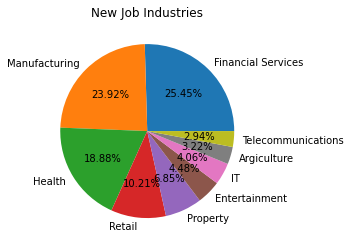

In [34]:
# Job Industries ( New Customer )
new_cust_list_clean.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('New Job Industries')
plt.ylabel('')
plt.show()

In [ ]:
new_cust_list_clean.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_cust_list_clean.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .2, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 200])
plt.title('New Age Distribution with State')
plt.show()

In [ ]:
new_cust_list_clean.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('state').agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Car Ownership with State')
plt.legend(['Does Not Own a Car', 'Owns a Car'])
plt.show()

In [ ]:
new_cust_list_clean.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 15, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Gender by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

In [ ]:
new_cust_list_clean.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 6, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,105])
plt.title('New Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

In [ ]:
new_cust_list_clean.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_cust_list_clean.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 175])
plt.title('New Gender with Age Distribution')
plt.show()

Segmenting existing customers into more specific class groups

In [35]:
addr_demo_txns['customer_segment'] = addr_demo_txns['total_score'].map({
    3: 'Platinum',
    4: 'Very Loyal',
    5: 'Becoming Loyal',
    6: 'Recent',
    7: 'Average',
    8: 'High Risk',
    9: 'Evasive',
    10: 'Losing',
    11: 'Inactive',
    12: 'Lost'
})
addr_demo_txns

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,gender,...,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation,customer_segment
customer_id,,,,,,,,,,,,,,,,,,,,,
1,7.0,11,3018.09,1,1,3,113,5,silver,Female,...,1,11.0,68.556157,70,060 Morning Avenue,2016,NSW,Australia,10,Becoming Loyal
2,128.0,3,2226.26,4,4,2,442,10,basic,Male,...,1,16.0,41.376954,40,6 Meadow Vale Court,2153,NSW,Australia,10,Losing
4,195.0,2,220.57,4,4,4,444,12,basic,Male,...,0,7.0,60.580634,60,0 Holy Cross Court,4211,QLD,Australia,9,Lost
6,64.0,5,3946.55,3,2,3,323,8,basic,Male,...,1,13.0,55.627760,60,9 Oakridge Court,3216,VIC,Australia,9,High Risk
7,253.0,3,220.11,4,4,4,444,12,basic,Female,...,1,11.0,46.190195,50,4 Delaware Trail,2210,NSW,Australia,9,Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,256.0,4,2045.84,4,4,2,442,10,basic,Male,...,1,19.0,36.021608,40,2565 Caliangt Point,2171,NSW,Australia,9,Losing
3497,52.0,3,1648.32,3,4,4,344,11,basic,Female,...,1,18.0,35.999705,40,96 Delladonna Trail,3976,VIC,Australia,5,Inactive
3498,127.0,6,3147.33,4,2,3,423,9,basic,Female,...,0,5.0,26.499168,30,3 Nova Point,3012,VIC,Australia,4,Evasive


In [38]:
top_1000 = addr_demo_txns.sort_values('total_score').head(1000)
top_1000

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,gender,...,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation,customer_segment
customer_id,,,,,,,,,,,,,,,,,,,,,
2992,9.0,8,6871.54,1,1,1,111,3,gold,Female,...,1,10.0,47.923290,50,9610 Gateway Trail,3429,VIC,Australia,5,Platinum
3080,4.0,9,4665.71,1,1,1,111,3,gold,Male,...,0,10.0,63.573166,60,0680 Veith Court,3939,VIC,Australia,8,Platinum
934,0.0,8,4899.60,1,1,1,111,3,gold,Male,...,0,6.0,26.277397,30,4 Eastlawn Crossing,2036,NSW,Australia,12,Platinum
200,7.0,9,7283.86,1,1,1,111,3,gold,Male,...,1,19.0,65.240552,70,7 Havey Point,4005,QLD,Australia,2,Platinum
3048,4.0,13,8379.96,1,1,1,111,3,gold,Male,...,0,16.0,52.933660,50,80302 Stang Parkway,3677,VIC,Australia,1,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,18.0,9,3740.76,2,1,3,213,6,bronze,Male,...,0,8.0,48.027330,50,4423 Bartelt Parkway,2038,NSW,Australia,12,Recent
767,42.0,5,2438.84,2,2,2,222,6,bronze,Male,...,0,11.0,66.379521,70,64 Muir Lane,2148,NSW,Australia,8,Recent
770,49.0,6,4457.48,3,2,1,321,6,basic,Female,...,1,13.0,38.239313,40,80 Scofield Alley,3121,VIC,Australia,10,Recent


In [37]:
# Export list of potential customers
top_1000.to_csv(r'Potential_Customers.csv', index = False, header=True)